In [1]:
#Build training and testing dataset of assignment 1 to predict the 
#probability of a survival of
#a person based on gender, age and passenger-class

## IMP Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMport the dataset

In [4]:
df = sns.load_dataset('titanic')
#df = pd.read_csv('https://github.com/datasciencedojo/datasets/blob/master/titanic.csv')

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [19]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Seperate the Input and Output Data

In [8]:
x = df[['pclass', 'sex', 'age']]
y = df['survived']

In [9]:
x

,pclass,sex,age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


## Label Encode the String Data

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
x['sex'] = le.fit_transform(x['sex'])

/tmp/ipykernel_19142/3494545095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sex'] = le.fit_transform(x['sex'])


In [14]:
x

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


In [15]:
x.shape

(891, 3)

In [16]:
x.isnull().sum()

pclass      0
sex         0
age       177
dtype: int64

In [17]:
x.fillna(method = 'pad', inplace = True)

/tmp/ipykernel_19142/1082184673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(method = 'pad', inplace = True)


In [18]:
x.isnull().sum()

pclass    0
sex       0
age       0
dtype: int64

In [20]:
x.describe()

,pclass,sex,age
count,891.000000,891.000000,891.00000
mean,2.308642,0.647587,29.58156
std,0.836071,0.477990,14.55459
min,1.000000,0.000000,0.42000
25%,2.000000,0.000000,20.00000
50%,3.000000,1.000000,28.00000
75%,3.000000,1.000000,38.00000
max,3.000000,1.000000,80.00000


In [21]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [23]:
set(y)

{0, 1}

In [24]:
np.unique(y)

array([0, 1])

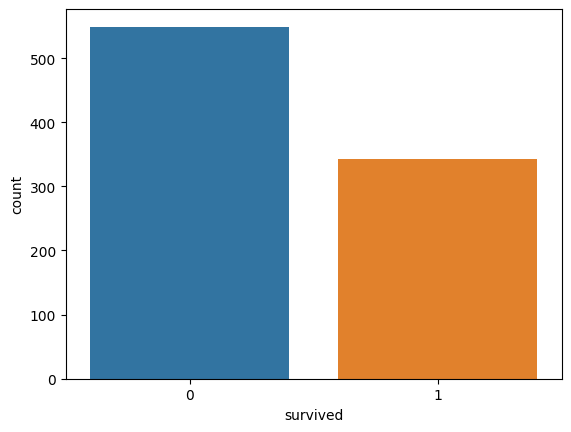

In [28]:
sns.countplot(x=y);

In [34]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [36]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

<Axes: xlabel='sex', ylabel='survived'>

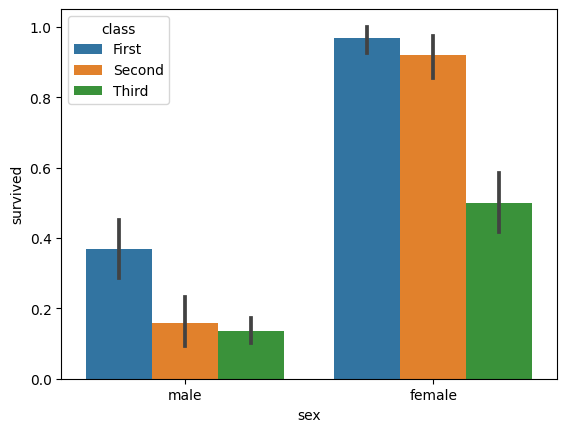

In [35]:
sns.barplot(x = 'sex', y = 'survived', data = df, hue = 'class')